### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».|

### Описание данных

## Оглавление
1. [Шаг 1. Ознакомление с данными](#introduction)

    1.1. [Общая информация о датафрейме.](#paragraph1-1)
2. [Шаг 2. Подготовка данных](#paragraph2)

   2.1. [Для удобства работы приведем названия столбцов к нижнему регистру:](#subparagraph2-1)
   
   2.2. [Изменение типа данных по столбцу user_score.](#subparagraph2-2)
   
   2.3. [Замена пропусков по столбцам critic_score и rating.](#subparagraph2-3)
   
   2.4. [Замена пропусков по столбцу year_of_release.](#subparagraph2-4)
   
   2.5. [Проработка пропусков по столбцу name.](#subparagraph2-5)
   
   2.6. [Отдельный столбец с суммой продаж по всем регионам 'sales_total':](#subparagraph2-6)
3. [Шаг 3. Исследовательский анализ данных](#paragraph3)

   3.1. [Функция для прорисовки графиков platform_bar:](#subparagraph3-1)
   
   3.2. [Количество выпущенных игр по годам:](#subparagraph3-2)
   
   3.3. [Количество выпущенных игр по платформам:](#subparagraph3-3)
   
   3.4. [Динамика продаж игр по платформам.](#subparagraph3-4)
   
   3.5. [Boxplot по глобальным продажам игр и с разбивкой по платформам.](#subparagraph3-5)
   
   3.6. [Влияние отзывов пользователей и критиков на продажи.](#subparagraph3-6)
   
   3.7. [Распределение игр по жанрам.](#subparagraph3-7)
4. [Шаг 4. Портрет пользователя регионов NA, EU, JP](#paragraph4)

   4.1. [Функция для прорисовки графиков top_regions:.](#subparagraph4-1)
   
   4.2. [Определение самых популярных платформ в заданных регионах:.](#subparagraph4-2)
   
   4.3. [Определение самых популярных жанров в заданных регионах:](#subparagraph4-3)
   
   4.4. [Влияние рейтинга ESRB на продажи в отдельном регионе.](#subparagraph4-4)
5. [Шаг 5. Проверка гипотез](#paragraph5)

   5.1. [Гипотеза № 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#subparagraph5-1)
   
   5.2. [Гипотеза № 2: Средние пользовательские рейтинги жанров Action и Sports разные.](#subparagraph5-2)
6. [Шаг 6. Общий вывод](#paragraph6)


### Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

## Шаг 1. Ознакомление с данными <a name="introduction"></a>

In [2]:
games = pd.read_csv('C:/Users/User/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### 1.1. Общая информация о датафрейме.  <a name="paragraph1-1"></a>

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Есть много пропусков и чуть позже рассмотрим их подробнее.

## Шаг 2. Подготовка данных <a name="paragraph2"></a>

### 2.1. Для удобства работы приведем названия столбцов к нижнему регистру:  <a name="subparagraph2-1"></a>

In [5]:
games.columns = games.columns.str.lower()

### 2.2. Изменение типа данных по столбцу user_score.  <a name="subparagraph2-2"></a>

Посмотрим отдельно столбцы user_score - его формат 'object, что очень странно, ведь если бы там были только числа и NaN'ы, то формат был бы 'float':

In [6]:
games['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

Всего 96 никальных записей, посмотрим более подробно. Есть NaN-ы и еще tbd.

In [7]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Проверим сколько нулей

In [8]:
games[games['user_score'] == '0']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


Одна строчка

In [9]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Рассмотреть сокращение, которое часто используется в сфере компьютерных игр - TBD (To Be Determined), то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется. Естественно, оно может применяться и в других случаях, но данный вариант является самым распространенным. Стоит отметить также, что у этой аббревиатуры могут быть и иные значения, например, To Be Done - должно быть сделано, или To Be Discussed - подлежит обсуждению.
#### То есть по сути - это игры без отзывов. TBD перведем в NaN, а потом поменяем тип столбца на числовой. И так как ноль у нас только в одной строчке, то все пропуски заменим на нули. Вполне возможно, что данные игры не оценивались критиками.

### 2.3. Замена пропусков по столбцам critic_score и rating.   <a name="subparagraph2-3"></a>

In [10]:
games[games['critic_score'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Нулей в столбце critic_score нет, то все пропуски будем менять на нули
#### Проверим еще пропуски по трем столбцам (user_score, critic_score и rating)

In [11]:
games[(games['user_score'].isnull()) & (games['critic_score'].isnull()) & (games['rating'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Похоже все данные игры без оценки критиков, пользователей и рейтинга от организации ESRB.

In [12]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
games[games['rating'] == 'RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13672,Clockwork Empires,PC,NaN,Strategy,0.0,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.0,0.01,0.0,0.00,65.0,NaN,RP


In [14]:
print('Пропусков', games['user_score'].isnull().sum())
print('Пропусков', games['critic_score'].isnull().sum())
print('Пропусков', games['rating'].isnull().sum())

Пропусков 6701
Пропусков 8578
Пропусков 6766


#### В столбце rating 6766 пропусков (причем из них 6621 пропуск содержится одновременно в трех столбцах)
- ЕС - Для детей младшего возраста (от 3 лет)
- Е - Для всех (от 6 лет, рейтинг K-A - тоже самое(устаревшее название))
- E10+ — Для всех от 10 лет и старше
- T - Подросткам, подходит для лиц от 13 лет и старше. 
- M - Для взрослых, подходит для лиц от 17 лет и старше.
- AO - Только для взрослых (18+) 
- RP - Рейтинг ожидается
#### Заменим пропуски на нули в двухстолбцах (user_score и critic_score) и на RP в столбце rating (их не много (3шт) и рейтинг по пропускам в процессе ожидания).

In [15]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [16]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

In [17]:
games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)

In [18]:
games['rating'] = games['rating'].fillna('RP')

In [19]:
print('Количество пропусков в столбце critic_score - {}'.format(games['critic_score'].isnull().sum()))
print('Количество пропусков в столбце user_score - {}'.format(games['user_score'].isnull().sum()))
print('Количество пропусков в столбце rating - {}'.format(games['rating'].isnull().sum()))

Количество пропусков в столбце critic_score - 0
Количество пропусков в столбце user_score - 0
Количество пропусков в столбце rating - 0


### 2.4. Замена пропусков по столбцу  year_of_release.   <a name="subparagraph2-4"></a>

In [20]:
df_not_null = games[games['year_of_release'].notnull()]
df_not_null.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,RP
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,RP


In [21]:
df_not_null = games[games['year_of_release'].notnull()]
df_not_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,RP
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,RP
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,RP
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0.0,RP
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0.0,RP


#### Функция для замены пропусков в столбце year_of_release

In [22]:
games.query('name == "LEGO Harry Potter: Years 5-7"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1609,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,0.69,0.42,0.0,0.12,76.0,7.8,E10+
2132,LEGO Harry Potter: Years 5-7,X360,NaN,Action,0.51,0.37,0.0,0.09,77.0,7.9,E10+
2273,LEGO Harry Potter: Years 5-7,PS3,NaN,Action,0.36,0.41,0.0,0.15,76.0,8.3,E10+
3081,LEGO Harry Potter: Years 5-7,DS,NaN,Action,0.34,0.25,0.0,0.07,69.0,0.0,E10+
4818,LEGO Harry Potter: Years 5-7,3DS,NaN,Action,0.18,0.19,0.0,0.03,71.0,6.5,E10+
6476,LEGO Harry Potter: Years 5-7,PSP,NaN,Action,0.10,0.10,0.0,0.06,0.0,0.0,E10+
7210,LEGO Harry Potter: Years 5-7,PC,NaN,Action,0.05,0.14,0.0,0.03,80.0,8.5,E10+
8059,LEGO Harry Potter: Years 5-7,PSV,2012.0,Action,0.07,0.07,0.0,0.03,64.0,6.8,E10+


In [23]:
def fill_year (row):
    games_content = []
    if np.isnan(row['year_of_release']):
        try:
            return df_not_null.loc[df_not_null['name']==row['name'], 'year_of_release'].array[0]
        except:
            games_content.append(row)
    return row['year_of_release'] 
           
games['year_of_release'] = games.apply(fill_year, axis = 1)

In [24]:
games.query('name == "LEGO Harry Potter: Years 5-7"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1609,LEGO Harry Potter: Years 5-7,Wii,2012.0,Action,0.69,0.42,0.0,0.12,76.0,7.8,E10+
2132,LEGO Harry Potter: Years 5-7,X360,2012.0,Action,0.51,0.37,0.0,0.09,77.0,7.9,E10+
2273,LEGO Harry Potter: Years 5-7,PS3,2012.0,Action,0.36,0.41,0.0,0.15,76.0,8.3,E10+
3081,LEGO Harry Potter: Years 5-7,DS,2012.0,Action,0.34,0.25,0.0,0.07,69.0,0.0,E10+
4818,LEGO Harry Potter: Years 5-7,3DS,2012.0,Action,0.18,0.19,0.0,0.03,71.0,6.5,E10+
6476,LEGO Harry Potter: Years 5-7,PSP,2012.0,Action,0.10,0.10,0.0,0.06,0.0,0.0,E10+
7210,LEGO Harry Potter: Years 5-7,PC,2012.0,Action,0.05,0.14,0.0,0.03,80.0,8.5,E10+
8059,LEGO Harry Potter: Years 5-7,PSV,2012.0,Action,0.07,0.07,0.0,0.03,64.0,6.8,E10+


In [25]:
games['year_of_release'] = games['year_of_release'].fillna(0)
games['year_of_release'] = games['year_of_release'].astype('int')
games['year_of_release'] = games['year_of_release'].replace(0, np.NaN)

In [26]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16569 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### 2.5. Проработка пропусков по столбцу  name.   <a name="subparagraph2-5"></a>

#### Пропуски по year_of_release немного уменьшели, оставим как есть

In [27]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,0.0,0.0,RP
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,0.0,0.0,RP


In [28]:
games.query('platform == "GEN" and year_of_release==1993.0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,0.0,0.0,RP
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,0.0,0.0,RP
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,0.0,0.0,RP
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,0.0,0.0,RP
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,0.0,0.0,RP
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,0.0,0.0,RP
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,0.0,0.0,RP
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,0.0,0.0,RP
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,0.0,0.0,RP


#### Две малоизвесные игры, оставим как есть

In [29]:
games = games.dropna(subset= ['name'])

### 2.6. Отдельный столбец с суммой продаж по всем регионам 'sales_total':   <a name="subparagraph2-6"></a>

In [30]:
games['sales_total'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

## Шаг 3. Исследовательский анализ данных   <a name="paragraph3"></a>

### 3.1. Функция для прорисовки графиков platform_bar:    <a name="subparagraph3-1"></a>

In [31]:
def platform_bar(groupby_column, func, x='name'):
    plt.style.use('seaborn-pastel')
    df_to_plot = games.groupby(groupby_column)[x]
    'sales_total'
    if func == 'count':
        df_to_plot_calculated = df_to_plot.count()
        figsize = (15,5)
        plot = df_to_plot_calculated.plot(kind='bar', x=x, figsize=figsize, color='#48D1CC', ec='black',
                                         title = 'Количество выпущенных игр по годам')
        plt.xlabel('Год выпуска', fontsize=15)
        plt.ylabel('Кол-во выпущенных игр, шт', fontsize=15)
    elif func == 'sum':
        df_to_plot_calculated = df_to_plot.sum().sort_values()
        figsize = (15,5)
        plot = df_to_plot_calculated.plot(kind='bar', x=x, figsize=figsize, color='#48D1CC', ec='black',
                                         title = 'Количество выпущенных игр по платформам')
        plt.xlabel('Игровая платформа', fontsize=15)
        plt.ylabel('Общие продажи, млн.$', fontsize=15)

### 3.2. Количество выпущенных игр по годам:    <a name="subparagraph3-2"></a>

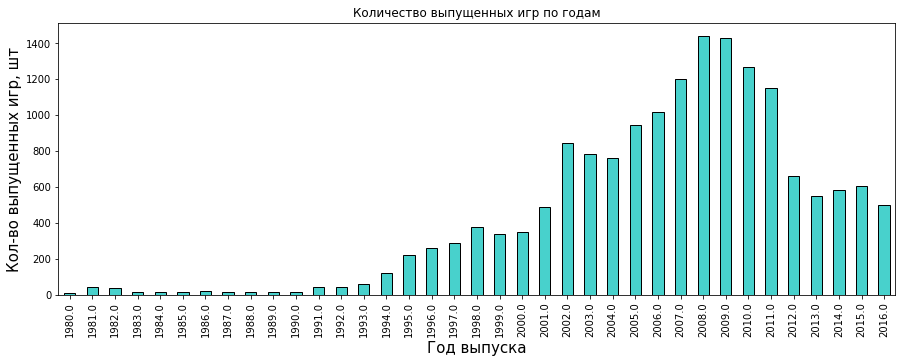

In [32]:
platform_bar('year_of_release', 'count')

До 1994 года игр практически не было. Потом они начали появляться. Скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик - 2008-2009 года. После этого начался спад, связанный с развитием мобильных устройств и игр к ним (и наверно соцсетей). Интерес к самим играм начал угасать, а как следствие их производство.

### 3.3. Количество выпущенных игр по платформам:    <a name="subparagraph3-3"></a>

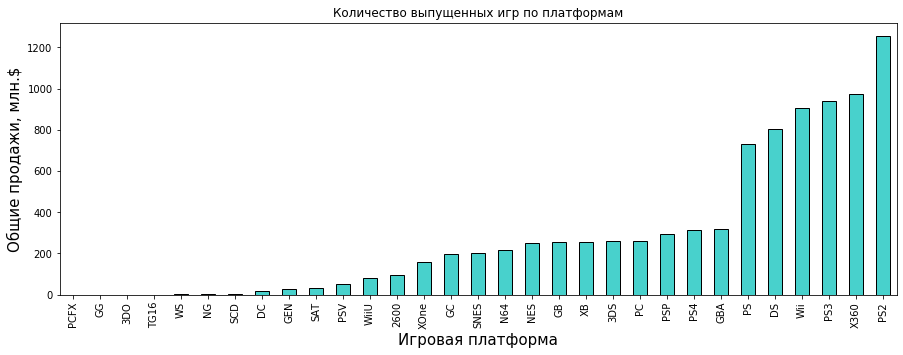

In [33]:
platform_bar('platform', 'sum', 'sales_total')

Лидером игровой индустрии является платформа PS2. Далее идут Xbox360, PS3 и Wii. 
Самые редкие платформы - представители японских технологий.

### 3.4. Динамика продаж игр по платформам.    <a name="subparagraph3-4"></a>

Выберем топ платформ, по которым были самые большие суммарные продажи игр за весь период

In [34]:
games.groupby('platform')['sales_total'].sum().to_frame('sales_total').sort_values(by='sales_total', ascending=False).head(10)

,sales_total
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Выберем топ 6 (а не топ 5), т.к. всё-таки PS надо взять в анализ. Между 5 и 6 местом не большая разбежка по выручке, а от 6 до 7 - больше чем в 2 раза.

In [35]:
games.query('year_of_release > 2012').groupby('platform')['sales_total']\
.sum().to_frame('sales_total').sort_values(by='sales_total', ascending=False).head(10)

,sales_total
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,40.06
PSV,32.99
Wii,13.66


Выберем топ 5 в актуальный период.

#### Функция для прорисовки графика

In [36]:
def top_platform (platform=None):
    func_dict = {'PS4', 'PS3', 'XOne', '3DS', 'X360', 'Wii'}    
    ax = plt.gca()
    legend_list = []
    if platform == None:
        platform = games['platform'].unique().tolist()
        bbox_y = 1.08
        legend_size = 15
    else:
        platform = platform
        bbox_y = 0.97
        legend_size = 9
   
    for platform in func_dict:
        df_plot = games.query('platform == @platform')
        lines = df_plot.groupby('year_of_release')['sales_total'].sum().plot(x='year_of_release', y='sales_total',
                                                                  style='.-', kind='line', fontsize=10, linewidth=3,
                                                                  label=platform, ax=ax, figsize=(10,5),
                                                                  title = 'Динамика продаж игр по платформам')
        legend_list.append(platform)
    
    ax.set_xlabel('')
    ax.legend(legend_list, prop={'size':legend_size}, bbox_to_anchor=(1.0, bbox_y))
    plt.xlabel('Год выпуска', fontsize=15)
    plt.ylabel('Общие продажи, млн.$', fontsize=15)

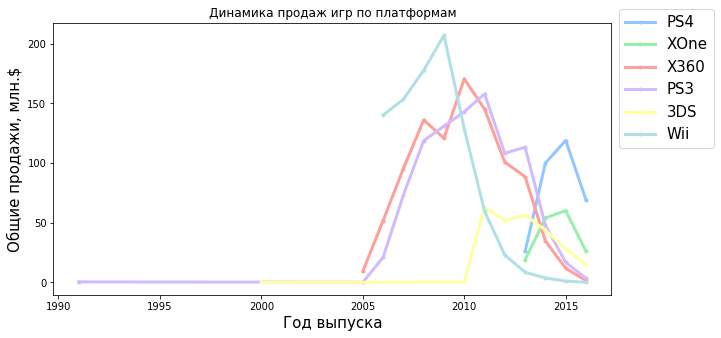

In [37]:
top_platform()

Посмотрим, сколько срок жизни платформ.

- PS - прожила с 1994 года до 2003, почти 10 лет;
- PS2 - с 1999 до 2011 года - 11 лет;
- PS3 - с 2006 по настоящее время ещё живёт, но начала сильно сдавать позиции с выходом PS4 (в топ мы ее не включали);
- DS - вышла в 1985, потом вообще нет данных, скорее всего, по той причине, что они не собирались. И с 2004 года популярность стала расти, пик в 2008, конец срока службы - 2013 год - 8 активных лет жизни;
- Wii - с 2006 по нынешний день, но в 2016 уже почти изжила себя - опять 10 лет.
### Таким образом, в среднем платформа живет 10 лет. И жила бы больше, если б не выходили более новые платформы и игры. При этом технические требованиям новых игр растет.

In [38]:
games_year_2012 = games.query('year_of_release > 2012').copy()

### 3.5. Boxplot по глобальным продажам игр и с разбивкой по платформам.     <a name="subparagraph3-5"></a>

In [39]:
def sales_boxplot(title=None, ylims=None):
    %matplotlib inline
    
    ax = games_year_2012.boxplot(column='sales_total', fontsize=30, figsize=(10,8),
                                 boxprops=dict(linestyle='-', linewidth=3), medianprops=dict(linestyle='-', linewidth=3),
                                 whiskerprops=dict(linestyle='-', linewidth=3), capprops=dict(linestyle='-', linewidth=3),
                                 notch=True)
   
    ax.set_xlabel('')
    ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=20, fontweight='bold')

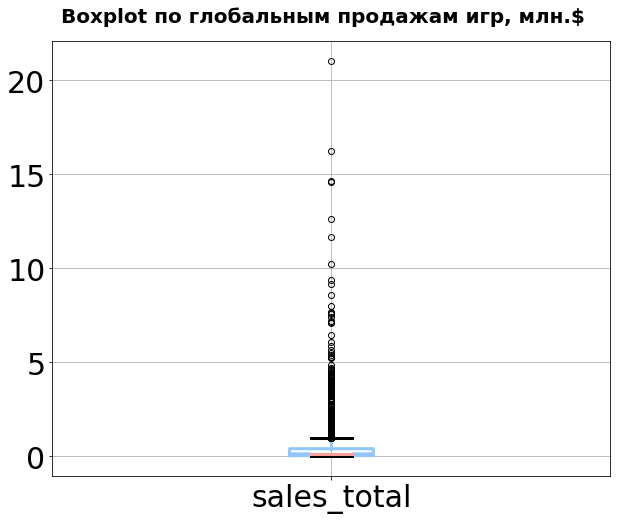

In [40]:
sales_boxplot('Boxplot по глобальным продажам игр, млн.$')

Увеличим масштаб

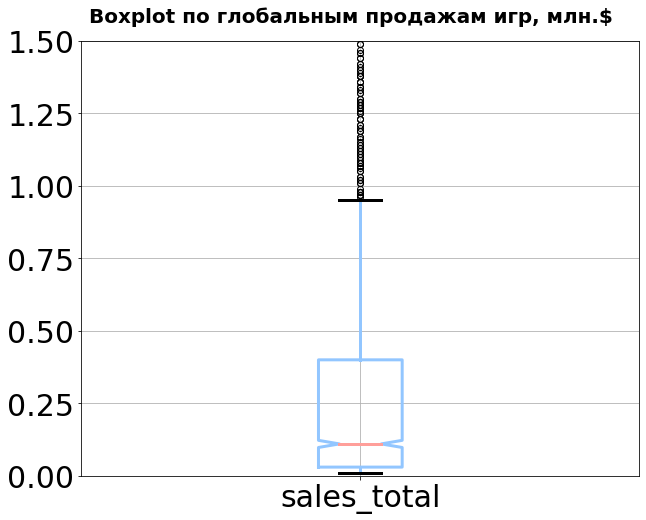

In [41]:
sales_boxplot('Boxplot по глобальным продажам игр, млн.$', ylims=[0,1.5])

В среднем, продажи игр составляют до 1,2 млн долларов. Медиана примерно 0,2 миллиона долларов.

In [42]:
def create_any_sales(title=None, query = None, ylims=None):
    df_query = games_year_2012.query(query)
    by_column = query.split()[0]
    ax = df_query.boxplot(column='sales_total', by=by_column, fontsize=30, figsize=(10,8),
                                         boxprops=dict(linestyle='-', linewidth=3),
                                         medianprops=dict(linestyle='-', linewidth=3),
                                         whiskerprops=dict(linestyle='-', linewidth=3),
                                         capprops=dict(linestyle='-', linewidth=3),
                                         notch=True)
    ax.set_xlabel('')
    ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=20, fontweight='bold')

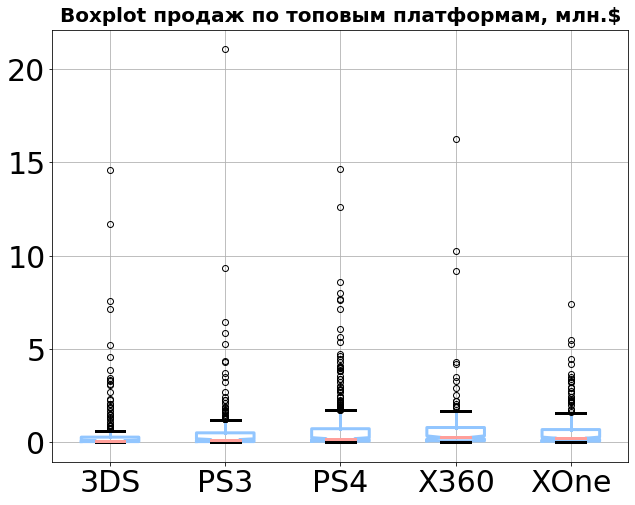

In [43]:
platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
create_any_sales('Boxplot продаж по топовым платформам, млн.$', query="platform in @platforms")

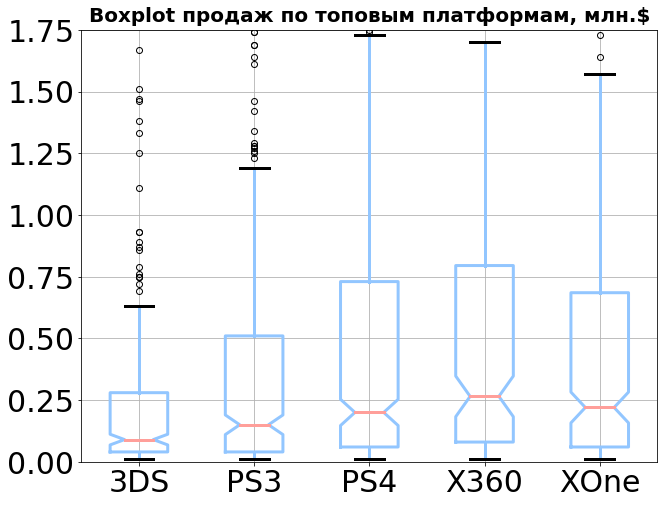

In [44]:
create_any_sales('Boxplot продаж по топовым платформам, млн.$', query="platform in @platforms", ylims=[0,1.75])

Медиана по топовым платформам варьируется от 0,12 до 0,26 млн долларов прибыли за игру.
В актуальный период (лидеры PS4 и X360) верхняя граница предела, за которыми уже определяются аномалии, у двух платформ на уровне 1,70 млн долларов сооветственно.
У остальных - от 0,65 до 1,55 миллионов долларов.
При этом следует отметить, что по сути лидируют два производителя игровых приставок (с новыми и старыми разновидностями консолей).

### 3.6. Влияние отзывов пользователей и критиков на продажи.    <a name="subparagraph3-6"></a>

За основу анализа возьмем X360 - она давно на рынке, по ней много данных, при этом даже на конец 2016 года она является одной из очень популярных игровых платформ.

#### Диаграмма рассеяния зависимости общей суммы продаж в актуальные годы игры от отзывов
#### Критиков:

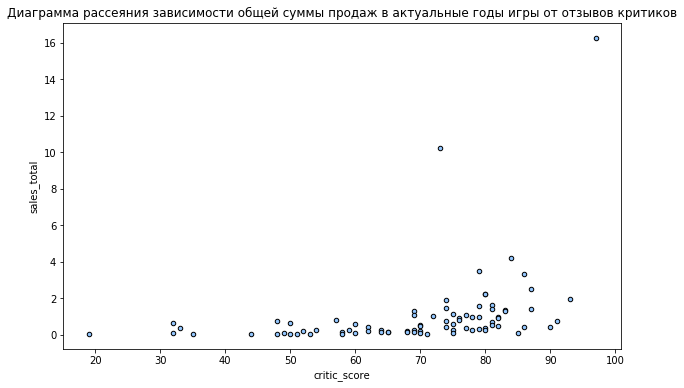

In [45]:
games_X360 = games_year_2012[(games_year_2012['platform'] == 'X360') & (games_year_2012['critic_score'] > 0)].copy()
games_X360.plot(kind='scatter', x='critic_score', y='sales_total', ec='black', figsize=(10,6), 
                title = 'Диаграмма рассеяния зависимости общей суммы продаж в актуальные годы игры от отзывов критиков')

С увеличением среднего рейтинга критиков увеличивается и средний уровень выручки с продажи игр, все что логично - чем качественнее игра, тем больше денег она приносит разработчику.

#### Теперь отзывов пользователей:

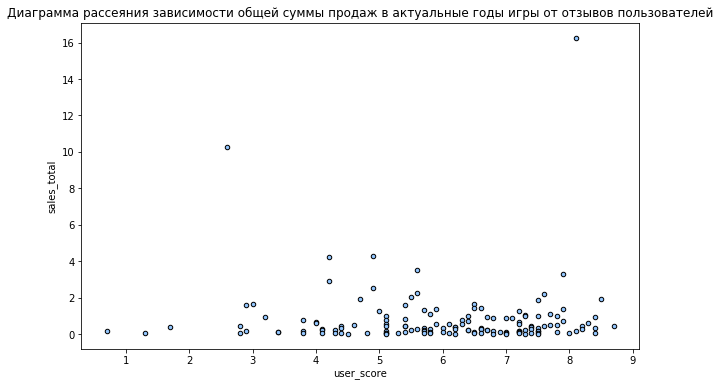

In [46]:
games_X360 = games_year_2012[(games_year_2012['platform'] == 'X360') & (games_year_2012['user_score'] > 0)].copy()
games_X360.plot(kind='scatter', x='user_score', y='sales_total', ec='black', figsize=(10,6), 
                title = 'Диаграмма рассеяния зависимости общей суммы продаж в актуальные годы игры от отзывов пользователей')

Такая же картина, правда выбросов несколько больше - когда рейтинг пользователей не велик, но тем не менее игра собирает большие деньги. Часто пользователи покупают разрекламированную игру из одной серии (из-за известного изначального названия), игра приносит разработчикам прибыль, а пользователь разочарован, и ставят оценку ниже заявленного статуса.

#### Матрица корреляции:

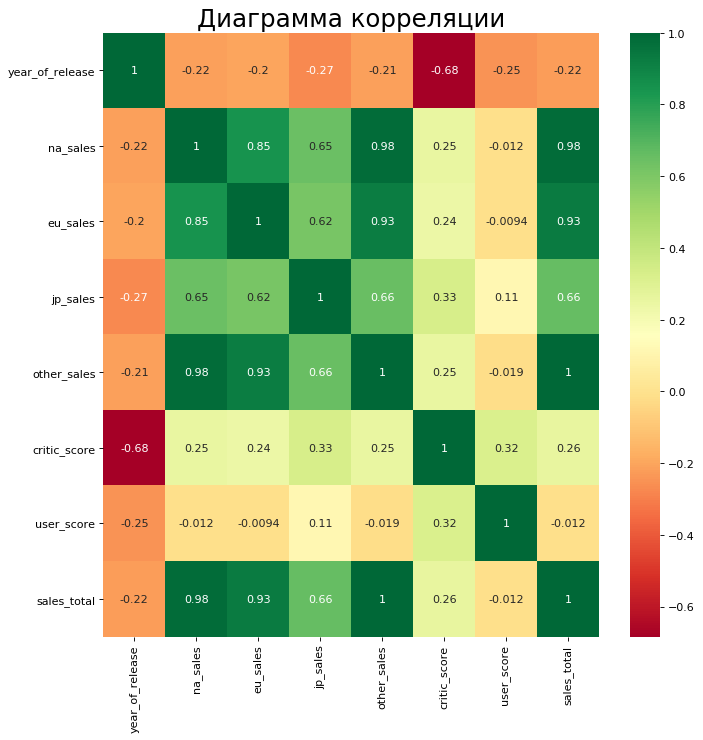

In [47]:
plt.figure(figsize=(10,10), dpi= 80)
sns.heatmap(games_X360.corr(), cmap='RdYlGn', annot=True)

# Decorations
plt.title('Диаграмма корреляции', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [48]:
games_X360_filter = games_X360[['sales_total' ,'critic_score', 'user_score']]

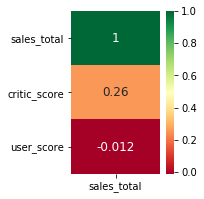

In [49]:
plt.figure(figsize=(2,3))
sns.heatmap(games_X360_filter.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), cmap='RdYlGn',
            annot=True, annot_kws={'size':12})

Сильнее всего на конечную стоимость влияет оценка критиков. Сильнее меньше, практически не влияет - оценка пользователей.

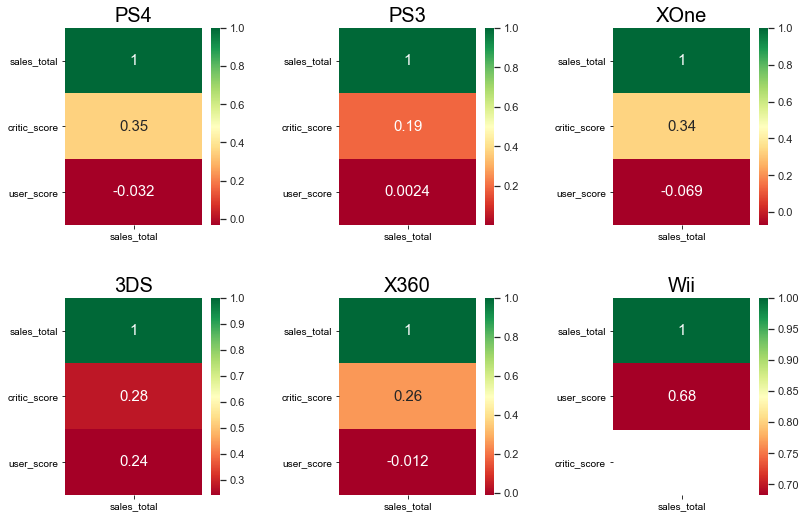

In [50]:
top_platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'Wii']

rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(12,8))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = games_year_2012[(games_year_2012['platform'] == curr_platform) & (games_year_2012['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), cmap="RdYlGn", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Данные по корреляции в актуальный период между выручкой и оценкой по платформам 'PS4', 'PS3', 'XOne', '3DS', 'X360' и 'Wii' в большей спенью совпадают с данными по датафрейму. При этом в современных играх на Америки и Европе определяющим фактором является оценка критиков. В азиацких платформах: в 3DS оказывае на продажи оценка критиков и пользователей, а на еще менее популяреую Wii - только оценка критиков.

### 3.7. Распределение игр по жанрам.    <a name="subparagraph3-7"></a>

Построим диаграмму с количеством и общей суммой продаж и расскажем о самых прибыльных жанрах

Text(0, 0.5, 'Общие продажи')

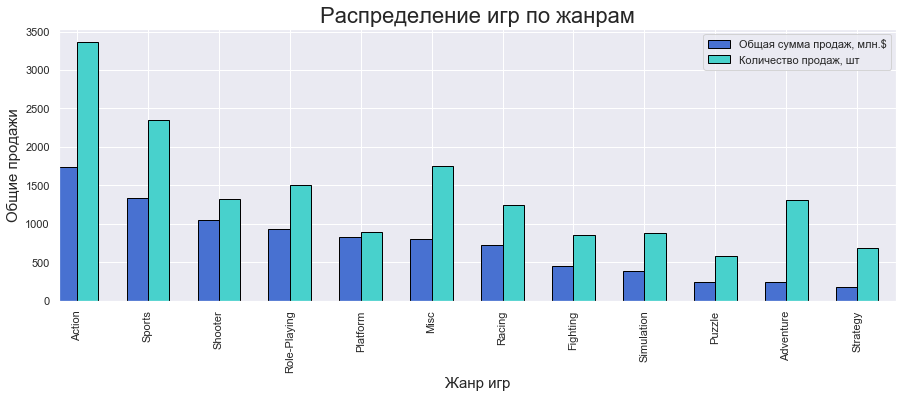

In [51]:
ax = plt.gca()

pivot = games.groupby('genre').agg({'name': 'count', 'sales_total': 'sum'}).sort_values(by='sales_total', ascending=False)

pl1 = pivot['sales_total']
pl1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.3, color='#4871d1', position=1)

pl2 = pivot['name']
pl2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.3, color='#48D1CC', position=0)

ax.legend(['Общая сумма продаж, млн.$', 'Количество продаж, шт'])
plt.title('Распределение игр по жанрам', fontsize=22)
plt.xlabel('Жанр игр', fontsize=15)
plt.ylabel('Общие продажи', fontsize=15)

Больше всего игр жанра Action. За ними идут игры жанра Спорт (причем, что игр меньше на рынке, а выручка от продаж у них не значительно отличаются). На третем месте - шутеры. 
Выделяются игры "смешанного" жанра Misc, выручка у них существенная.
При этом не стоит забывать, что игры Action, Sports и Shooter - это игры для более дорогих платформ, где и разработка так же дороже.

## Шаг 4. Портрет пользователя регионов NA, EU, JP   <a name="paragraph4"></a>

Определим для пользователя каждого региона (NA, EU, JP):

самые популярные платформы (топ-5), опишем различия в долях продаж;
самые популярные жанры (топ-5), поясним разницу;
определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

### 4.1. Функция для прорисовки графиков top_regions:.   <a name="subparagraph4-1"></a>

In [52]:
platform_list = ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'Wii']
 
def top_regions(groupby, region_sales, ax):
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    pivot = games_year_2012.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    
 
    all_sales = games_year_2012.query('platform in @platform_list')[region_sales].sum()
 
    def func_pct(pct):
        value = float(pct*all_sales/100)
        return "{:.1f}%\n({:.0f}млн$.)".format(pct, value)
    plot = pivot.plot(kind='pie', ax=axes[ax], subplots=True, fontsize=15,
                      autopct=lambda pct: func_pct(pct), use_index=False, pctdistance=0.45,figsize=(25,6),
                      colormap='Pastel1', legend = False)
    axes[ax].set_title(title_dict[region_sales], fontsize=25)

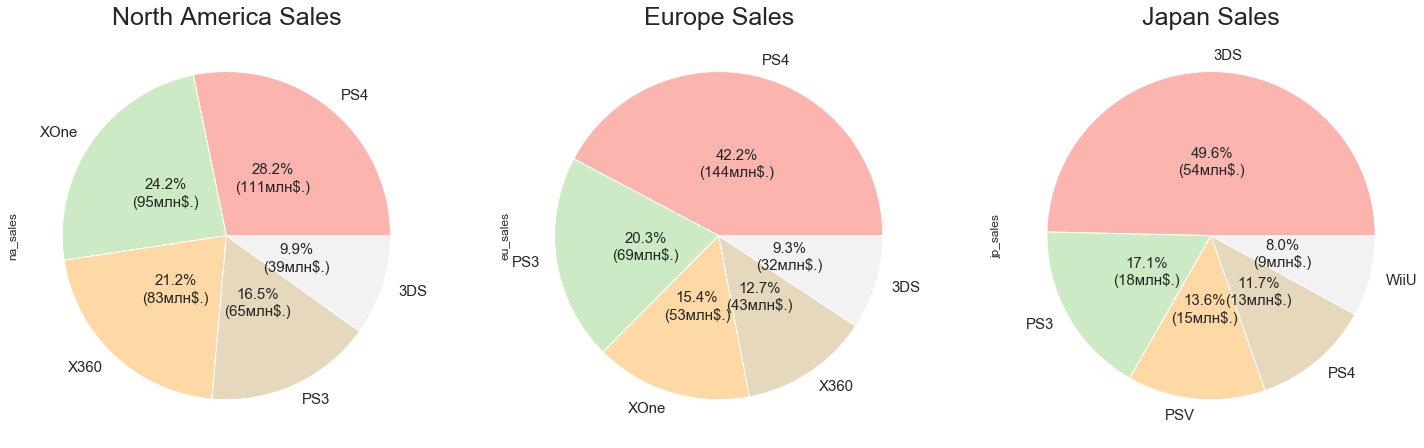

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(25, 8))
top_regions('platform', 'na_sales', 0)
top_regions('platform', 'eu_sales', 1)
top_regions('platform', 'jp_sales', 2)

#### Второй вариант построения графиков. Более, как мне показался наглядный вид построения графиков (первый не удалял, оставил для себя для примера) 

In [54]:
def top_in_regions(groupby, region_sales, ax):
    pivot = games_year_2012.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'MediumBlue', 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax],
                      fontsize=18, color=color_dict[region_sales], rot=0)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

### 4.2. Определение самых популярных платформ в заданных регионах:.  <a name="subparagraph4-2"></a>

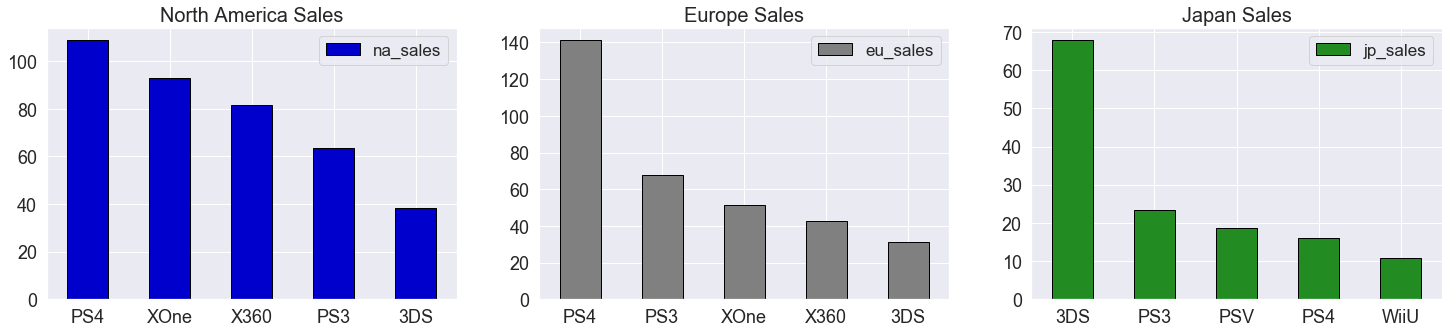

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

top_in_regions('platform', 'na_sales', 0)
top_in_regions('platform', 'eu_sales', 1)
top_in_regions('platform', 'jp_sales', 2)

- В Северной Америке имеют(имели) бешеную популярность приставки прошлого поколения X360 и PS3. По сути лидидуют два прозводителя консолей.  Немного отстает 3DS.
- В Европе лидирует PS4 и PS3. За ними американские XOne и X360, затем 3DS.
- В Японии всё наоборот. Лидер - 3DS. За ними PS3, PSV и PS4. Далее чисто японские WiiU.

### 4.3. Определение самых популярных жанров в заданных регионах:   <a name="subparagraph4-3"></a>

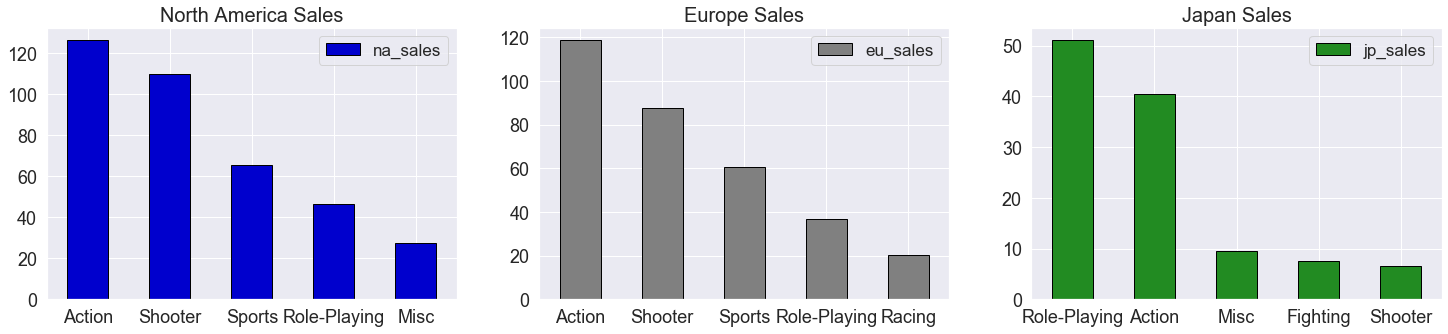

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

top_in_regions('genre', 'na_sales', 0)
top_in_regions('genre', 'eu_sales', 1)
top_in_regions('genre', 'jp_sales', 2)

- Вкусы в Северной Америке и Европе схожи: и там, и там живут фанаты Action, Sports и Shooter. В Северной Америке больше играют в платформеры, в Европе же чаще выбирают гонки.
- В Японии вкус совершенно иной - на первом месте ролевые игры, причем с большим отрывом. Далее Action и Misc.

### 4.4. Влияние рейтинга ESRB на продажи в отдельном регионе.   <a name="subparagraph4-4"></a>

Вспомним основные обозначения ESRB
- ЕС - Для детей младшего возраста (от 3 лет)
- Е - Для всех (от 6 лет, рейтинг K-A - тоже самое(устаревшее название))
- E10+ - Для всех от 10 лет и старше
- T - Подросткам, подходит для лиц от 13 лет и старше. 
- M - Для взрослых, подходит для лиц от 17 лет и старше.
- AO - Только для взрослых (18+) 
- RP - Рейтинг ожидается

Добавим новый столбец в основной датафрейм с разъяснением,

In [57]:
ESRB_dict = {'E': 'Для всех', 'EC': 'Для всех', 'K-A': 'Для всех',  'E10+': '>10 лет', 'T': '13-19 лет', 
             'M': '> 17 лет', 'AO': '> 18 лет'}
games_year_2012['ESRB_description'] = games_year_2012['rating'].map(ESRB_dict)

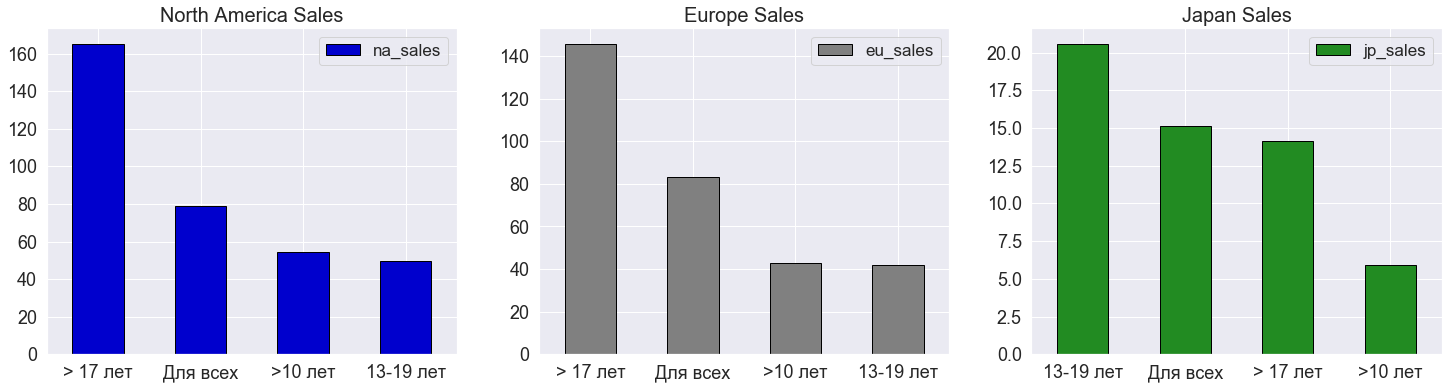

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions('ESRB_description', 'na_sales', 0)
top_in_regions('ESRB_description', 'eu_sales', 1)
top_in_regions('ESRB_description', 'jp_sales', 2)

- В Северной Америке и в Европе картина практически одинаковая. Большая часть выручки получено с игр с рейтингом "17+", поровну с рейтингом "10+" и "13-19 лет". Только уровень ниже
- В Японии опять не так. Первое место - "13-19 лет", а вот на втором - "Для всех", затем 17+ и 10+.

## Шаг 5. Проверка гипотез   <a name="paragraph5"></a>

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.

### 5.1. Гипотеза № 1:   <a name="subparagraph5-1"></a>
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [59]:
def score_sales(title=None, query = None, ylims=None):
    df_query = games_year_2012.query(query)
    by_column = query.split()[0]
    ax = df_query.boxplot(column='user_score', by=by_column, fontsize=30, figsize=(10,8),
                                         boxprops=dict(linestyle='-', linewidth=3),
                                         medianprops=dict(linestyle='-', linewidth=3),
                                         whiskerprops=dict(linestyle='-', linewidth=3),
                                         capprops=dict(linestyle='-', linewidth=3),
                                         notch=True)
    ax.set_xlabel('')
    ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')

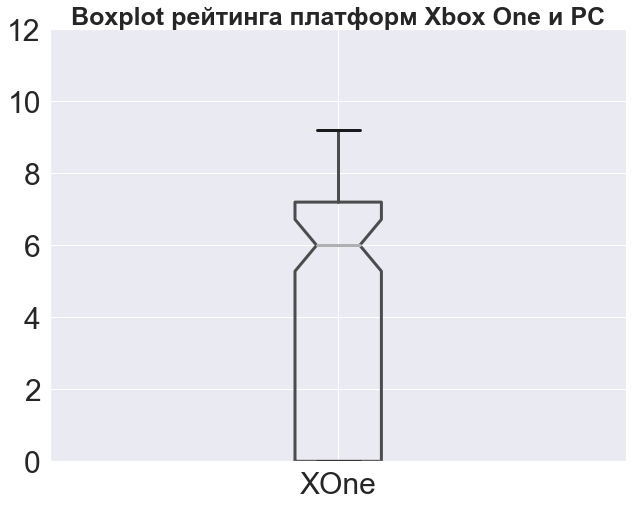

In [60]:
platforms = ['XOne', 'PS']
score_sales('Boxplot рейтинга платформ Xbox One и PC', query="platform in @platforms", ylims=[0,12])

In [61]:
xbox_one_rating = games_year_2012[(games_year_2012['platform'] == 'XOne') & (games_year_2012['user_score'] > 0)]['user_score']
pc_rating = games_year_2012[(games_year_2012['platform'] == 'PC') & (games_year_2012['user_score'] > 0)]['user_score']

Расчет p-значения:

In [62]:
from scipy import stats as st

results = st.ttest_ind(xbox_one_rating, pc_rating)
print('p-значение:', results.pvalue)

p-значение: 0.15503167687396294


In [63]:
alpha = 0.05
print('Пороговое значение alpha = 0.05')

Пороговое значение alpha = 0.05


In [64]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Верно следующее утверждение: средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [65]:
print('Средняя оценка пользователей игр для платформы Xbox One  - {:.2f}'.format(xbox_one_rating.mean()))
print('Средняя оценка пользователей игр для платформы PC - {:.2f}'.format(pc_rating.mean()))

Средняя оценка пользователей игр для платформы Xbox One  - 6.52
Средняя оценка пользователей игр для платформы PC - 6.28


Не получилось отвергнуть нашу гипотезу, а это значит, что хоть средние пользовательские рейтинги платформ Xbox One и PC немного различаются, но мы можем сказать, что такое различие получилось случайно и в целом рейтинги одинаковые. 

### 5.2. Гипотеза № 2:   <a name="subparagraph5-2"></a>
### Средние пользовательские рейтинги жанров Action и Sports разные.

- Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

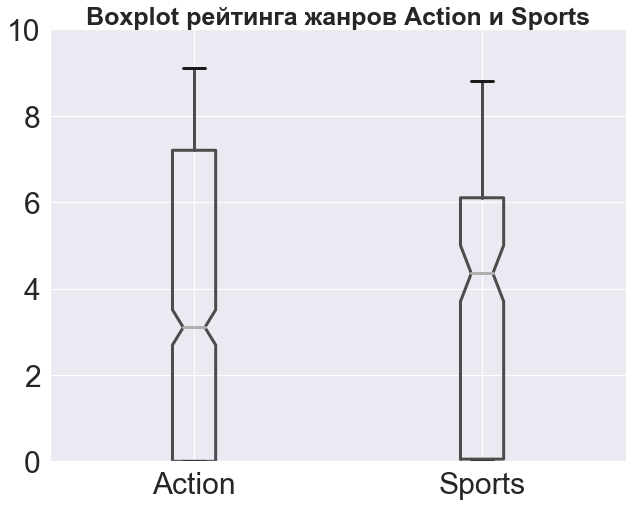

In [66]:
genres = ['Action', 'Sports']
score_sales('Boxplot рейтинга жанров Action и Sports', query="genre in @genres", ylims=[0,10])

In [67]:
action_rating = games_year_2012[(games_year_2012['genre'] == 'Action') & (games_year_2012['user_score'] > 0)]['user_score']
sports_rating = games_year_2012[(games_year_2012['genre'] == 'Sports') & (games_year_2012['user_score'] > 0)]['user_score']

In [68]:
results = st.ttest_ind(action_rating, sports_rating)
print('p-значение:', results.pvalue)

p-значение: 8.11729623919141e-28


In [69]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


In [70]:
print('Средняя оценка пользователей жанра Action  - {:.2f}'.format(action_rating.mean()))
print('Средняя оценка пользователей жанра Sports - {:.2f}'.format(sports_rating.mean()))

Средняя оценка пользователей жанра Action  - 6.84
Средняя оценка пользователей жанра Sports - 5.24


Полученное говорит о том, что можно сделать вывод о значимом различии между средними пользовательскими рейтингами жанров Action и Sports 

## Шаг 6. Общий вывод    <a name="paragraph6"></a>

В большей степени влияние на итоговую выручку оказывает оценка критиков. Оценка пользователей такого влияния на выручку не оказывает.

В целом ситуация в сфере игровых платформ следующая - рынок данный игр постепенно погибает. Сейчас идет погоня за новыми технологиями, за сверхвысокой графикой и как следствие бюджет на игру растет. Игроку больше нравиться хорошая картинка и оптимизация.

Итог, самые крутые производители гоняются за технологиями, а более мелкие компании вынуждены покидать рынок, т.к. новая идея игры почти сейчас не ценится. 
Всё это привело к тому, что рынок уже который год падает. И, скорее всего, будет падать дальше.

По сути на основных мировых рынках игр остались два производителя с разными моделями консолей. Для них важно знать портрет пользователя, учитывая его предпочтения они строят свои рекламные компанию. 

Успешность игры в свою опеделяется следующими основными факторами:
 - на какой платформе она выходит;
 - жанр игры;
 - и ожидаемая оценка критиков.